Retail Sales Project

This project...

In [100]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

features = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/archive/Features Data Set.csv")
sales = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/archive/sales data-set.csv")
stores = pd.read_csv("/Users/oliver/Documents/Data Analyst Project/archive/stores data-set.csv")

Data frames

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [72]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [17]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Data Cleaning

In [4]:
#CLEANING

#Checking null values and cleaning

features.isnull().sum()
markdowns = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]
features[markdowns] = features[markdowns].fillna(0)

#Cheking Data types and cleaning "Date" column from object to date

features["Date"]=pd.to_datetime(features["Date"])

sales["Date"]=pd.to_datetime(sales["Date"])

#Cheking for duplicates

duplicatesfeat = features.duplicated().sum()
duplicatessale = sales.duplicated().sum()
duplicatesstore = stores.duplicated().sum()


Joining Data

In [5]:
#Joining tables with the "Date" column

retail = pd.merge(sales, features,
                  how="left", on=["Store","Date","IsHoliday"])

retail.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


Best and worst store performance

In [42]:
#Store with more and less sales

weeklysales = retail.groupby("Store").agg({"Weekly_Sales":"sum"})

#Remove scientfic notations

weeklysales['Weekly_Sales'] = weeklysales['Weekly_Sales'].round()

#sort

weeklysales = weeklysales.sort_values('Weekly_Sales')

weeklysales = weeklysales.reset_index()


minimum = weeklysales[ weeklysales["Weekly_Sales"] == weeklysales["Weekly_Sales"].min() ]

maximum = weeklysales[ weeklysales["Weekly_Sales"] == weeklysales["Weekly_Sales"].max() ]

print("From", retail["Date"].min().date(), "to",retail["Date"].max().date(),", the store" ,minimum.iloc[0,0], "have the minimum sales with", minimum.iloc[0,1], "sales in total.") 
print(" ")
print("From", retail["Date"].min().date(), "to",retail["Date"].max().date(),", the store" ,maximum.iloc[0,0], "have the maximum sales with", maximum.iloc[0,1], "sales in total.") 




From 2010-01-10 to 2012-12-10 , the store 33 have the minimum sales with 37160222.0 sales in total.
 
From 2010-01-10 to 2012-12-10 , the store 20 have the maximum sales with 301397792.0 sales in total.


Sales per week throught time

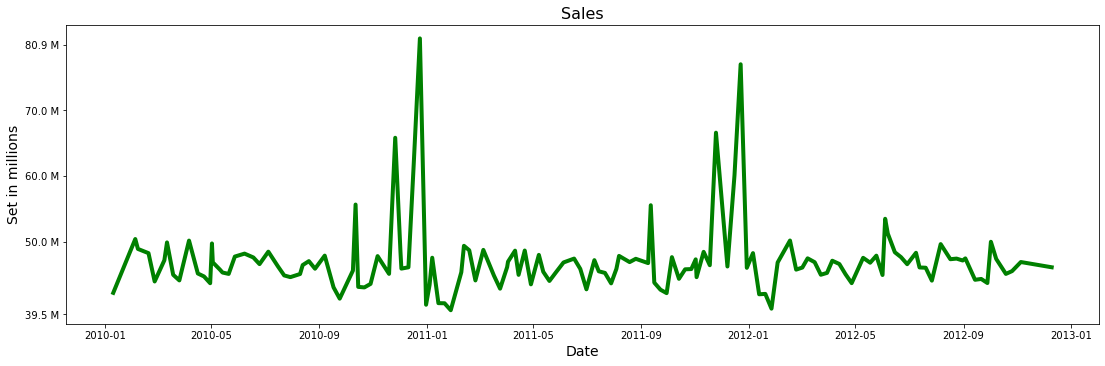

In [7]:
#Prepare a dta frame with the values we are going to use

time_series = retail.groupby(by='Date').agg({"Weekly_Sales":"sum"})

time_series["Weekly_Sales"] = time_series["Weekly_Sales"]/1000000

fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(time_series.index, time_series['Weekly_Sales'],color="green", linewidth=4)

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label 
ax.set_ylabel('Sales')

ax.set_title('Sales', size=16)

ax.set_ylabel('Set in millions', size = 14)

ax.set_xlabel('Date', size = 14)

fig.set_size_inches(18.5, 5.5)

plt.yticks([39.0, 50.0, 60.0, 70.0, 80.0],
          ["39.5 M", "50.0 M", "60.0 M", "70.0 M", "80.9 M"])

# This can be use in case i want to get rid of 1e7 (Scientific notation)
# ax.ticklabel_format(useOffset=False, style='plain', axis='y')

# Show the figure
plt.show()

Correlations

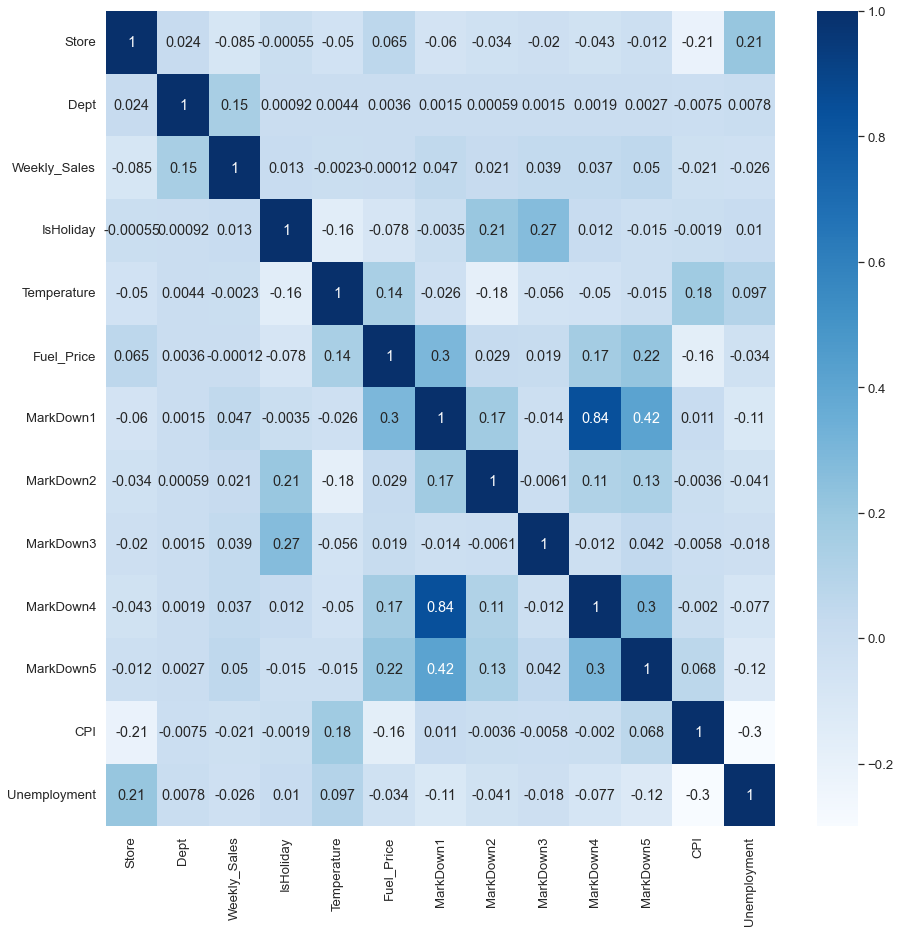

In [114]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(retail.corr(),cmap="Blues", annot=True)
plt.show()

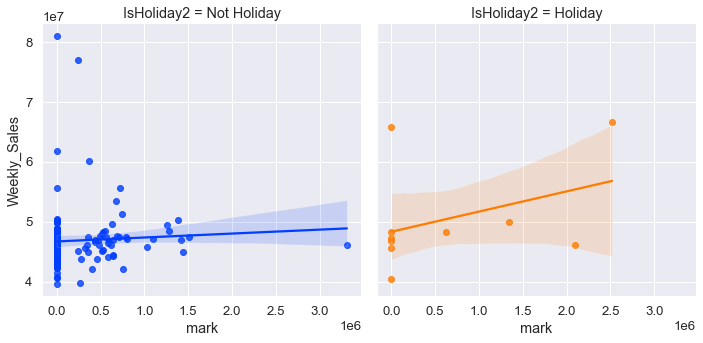

In [83]:
#Creating the DataFrames that we will use to analize the correlation between Sales, Markdowns(All of them) and Holidays.

#First the creation of the total mark downs per store

lol = features.groupby(["Date"])[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]].sum()
lol['mark'] = lol.apply(lambda x: x['MarkDown1'] + x["MarkDown2"] + x["MarkDown3"] + x["MarkDown4"] + x["MarkDown5"], axis=1)
del lol["MarkDown1"]
del lol["MarkDown2"]
del lol["MarkDown3"]
del lol["MarkDown4"]
del lol["MarkDown5"]

#sdasdasd

sol = sales
sol = sales.groupby(["Date","IsHoliday"]).agg({"Weekly_Sales":"sum"})
sol = sol.round()
sol = sol.reset_index()
sol = sol.set_index("Date")


#After that we merge the two DataFrames

fin = pd.merge(lol, sol,
                  how="inner", on=["Date"])

# To display 1000 rows: "pd.set_option('display.max_rows', 1000)"


#Creat column with 1 when Holiday is True and 0 when Holiday is False.
fin["IsHoliday1"] = fin["IsHoliday"].astype(int)

#Create another column to display Holiday when 1 and Not Holiday when 0.

fin.loc[fin['IsHoliday1'] == 0, 'IsHoliday2'] = 'Not Holiday' 
fin.loc[fin['IsHoliday1'] == 1, 'IsHoliday2'] = 'Holiday'

#Making the plot

sns.lmplot(x="mark", y="Weekly_Sales", 
            data=fin,
            palette = "bright",
            col = "IsHoliday2",
            hue = "IsHoliday2") 
sns.set(font_scale=1.2)

# Show plot
plt.show()


In [81]:

big = fin.loc[fin['IsHoliday'] == True]
big = big.sort_values(by="Weekly_Sales", ascending = False)
print("Here we can see that 2011-11-25 is the date where, beeing holiday, the correlation between weekly sales and markdowns is higher but definitibly the correlation overall is week.")
print("")
big.head(3)

Here we can see that 2011-11-25 is the date where, beeing holiday, the correlation between weekly sales and markdowns is higher but definitibly the correlation overall is week.



,mark,IsHoliday,Weekly_Sales,IsHoliday1,IsHoliday2
Date,,,,,
2011-11-25,2517699.47,True,66593605.0,1,Holiday
2010-11-26,0.00,True,65821003.0,1,Holiday
2012-10-02,1346204.71,True,50009408.0,1,Holiday


There are more outliers not beeign holiday but the median is higher when Holidays


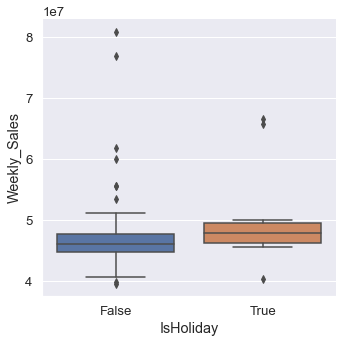

In [79]:
g = sns.catplot(x="IsHoliday", y="Weekly_Sales", 
            data=fin,
            kind = "box") 
sns.set(font_scale=1.2)
print("There are more outliers not beeign holiday but the median is higher when Holidays")
# Show plot
plt.show()

Best weekly sales

In [77]:
#Best 3 not holiday weeks

best3 = fin.sort_values(by="Weekly_Sales",ascending=False)
best3 = best3.loc[best3['IsHoliday'] == False]
best3[["Weekly_Sales","IsHoliday","mark"]].head(3)

,Weekly_Sales,IsHoliday,mark
Date,,,
2010-12-24,80931416.0,False,0.00
2011-12-23,76998241.0,False,247622.08
2010-12-17,61820800.0,False,0.00


In [78]:
#Best 3 holiday weeks
best3s = fin.sort_values(by="Weekly_Sales",ascending=False)
best3s = best3s.loc[best3s['IsHoliday'] == True]
best3s[["Weekly_Sales","IsHoliday","mark"]].head(3)

,Weekly_Sales,IsHoliday,mark
Date,,,
2011-11-25,66593605.0,True,2517699.47
2010-11-26,65821003.0,True,0.00
2012-10-02,50009408.0,True,1346204.71


Stores Analisys

In [148]:
#sdasdasd

stores1 = sales
stores1 = sales.groupby(["Store"]).agg({"Weekly_Sales":"sum"})
stores1 = stores1.round()

be = stores1.sort_values(by="Weekly_Sales",ascending=False)
bo = stores1.sort_values(by="Weekly_Sales",ascending=True)

print("Best 3 stores performance")
print()
print(be[["Weekly_Sales"]].head(3))
print()
print("Worst 3 stores performance")
print()
print(bo[["Weekly_Sales"]].head(3))

Best 3 stores performance

       Weekly_Sales
Store              
20      301397792.0
4       299543953.0
14      288999911.0

Worst 3 stores performance

       Weekly_Sales
Store              
33       37160222.0
44       43293088.0
5        45475689.0


In [175]:
#Find best 3 departments in the store 20

storess1 = sales.loc[sales['Store'] == 20]

storess1 = storess1.groupby("Dept").agg({"Weekly_Sales":"sum"})

storess1 = storess1.sort_values(by="Weekly_Sales", ascending=False)

storess1.head(3)

,Weekly_Sales
Dept,
92,23542625.04
95,21537795.62
38,15759345.93


In [176]:
#Find worst 3 departments in the store 33

storess2 = sales.loc[sales['Store'] == 30]

storess2 = storess2.groupby("Dept").agg({"Weekly_Sales":"sum"})

storess2 = storess2.sort_values(by="Weekly_Sales", ascending=True)

storess2.head(3)

,Weekly_Sales
Dept,
99,-7.06
19,2.38
33,14.50


AHORA ORDENAR TODO Y YA ESTA PARA SUBIRLO, ESPECIFICAR QUE EL DASHBOARD COMPLETO ESTA HECHO EN TABLEAU.